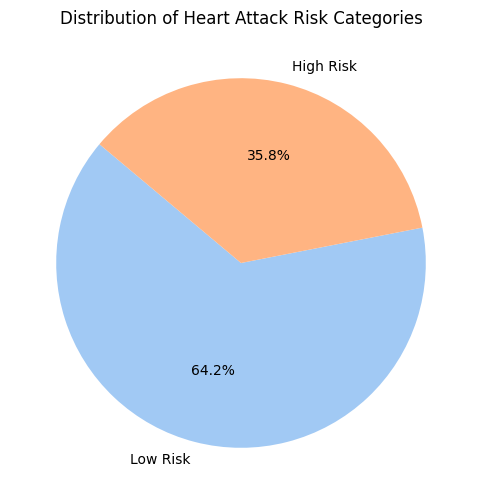

Mean Squared Error: 0.230
R-squared (Accuracy): 0.03%
Coefficients: [ 0.00021114  0.00013339  0.0003241  -0.00010953 -0.00010456]
Intercept: 0.2855539766744282


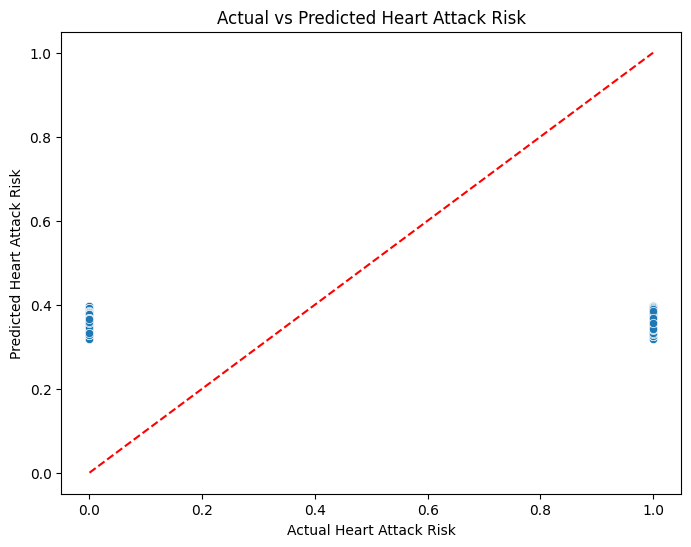

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv.zip'
df = pd.read_csv(dataset_path)

# Process 'Blood Pressure' column (split into systolic and diastolic)
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

# Define features and target
feature_columns = ['Age', 'Cholesterol', 'Systolic Pressure', 'Diastolic Pressure', 'Heart Rate']
target_column = 'Heart Attack Risk'

# Check columns
for col in feature_columns + [target_column]:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in dataset.")

# Drop missing values
df = df.dropna(subset=feature_columns + [target_column])

# Create risk categories for pie chart visualization (adjust thresholds as needed)
def risk_category(risk):
    if risk < 0.33:
        return 'Low Risk'
    elif risk < 0.66:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['Risk Category'] = df[target_column].apply(risk_category)

# Pie chart: distribution of risk categories
risk_counts = df['Risk Category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Heart Attack Risk Categories')
plt.show()

# Prepare data for regression
X = df[feature_columns]
y = df[target_column]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared (Accuracy): {r2*100:.2f}%")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Heart Attack Risk')
plt.ylabel('Predicted Heart Attack Risk')
plt.title('Actual vs Predicted Heart Attack Risk')
plt.show()


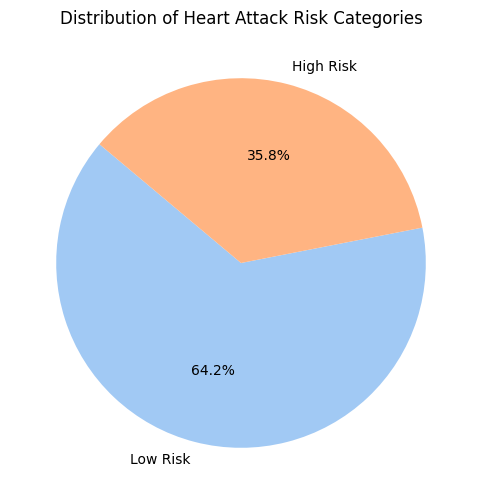

Accuracy: 64.18%

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.64      1.00      0.78      1125
   High Risk       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


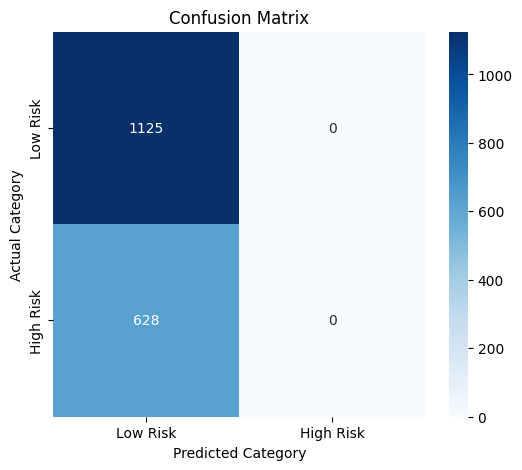

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv.zip'
df = pd.read_csv(dataset_path)

# Process 'Blood Pressure' column (split into systolic and diastolic)
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

# Define features and target
feature_columns = ['Age', 'Cholesterol', 'Systolic Pressure', 'Diastolic Pressure', 'Heart Rate']
target_column = 'Heart Attack Risk'

# Drop missing values
df = df.dropna(subset=feature_columns + [target_column])

# Convert continuous risk into categories
def risk_category(risk):
    if risk < 0.33:
        return 'Low Risk'
    elif risk < 0.66:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['Risk Category'] = df[target_column].apply(risk_category)

# Encode target categories into numbers for classification
category_map = {'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2}
df['Risk Category Label'] = df['Risk Category'].map(category_map)

# Pie chart: distribution of risk categories
risk_counts = df['Risk Category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Heart Attack Risk Categories')
plt.show()

# Prepare data for logistic regression
X = df[feature_columns]
y = df['Risk Category Label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%\n")

print("Classification Report:")
# Get unique labels from y_test and y_pred
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
# Create target names based on the unique labels
report_target_names = [list(category_map.keys())[list(category_map.values()).index(label)] for label in unique_labels]
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=report_target_names))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=report_target_names,
            yticklabels=report_target_names)
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Confusion Matrix')
plt.show()

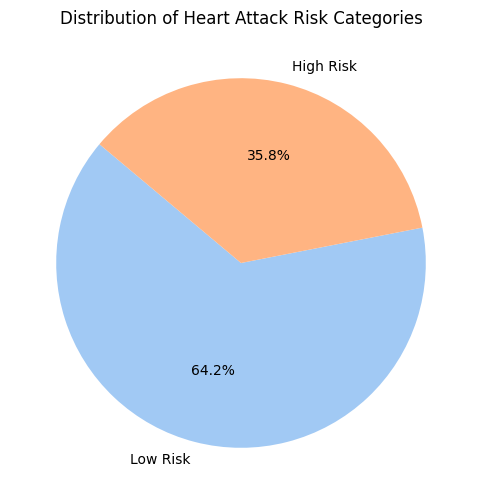

Accuracy: 53.91%

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.64      0.63      0.64      1125
   High Risk       0.36      0.37      0.37       628

    accuracy                           0.54      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.54      0.54      0.54      1753



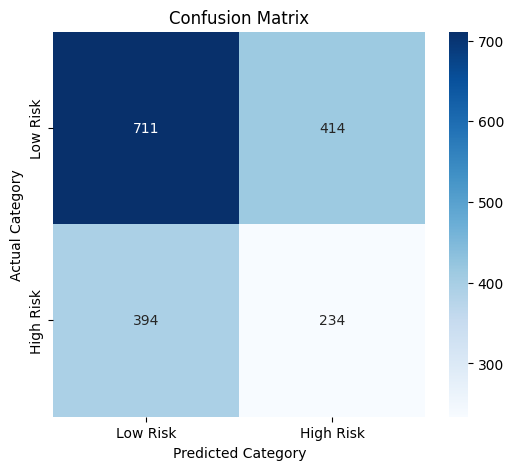

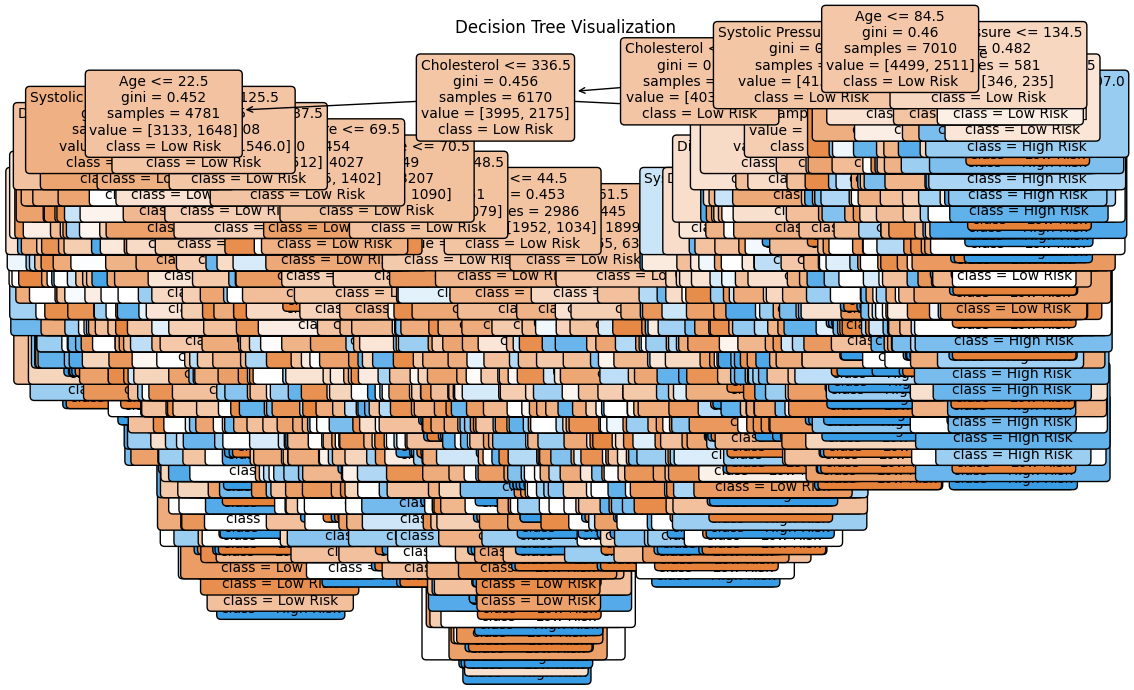

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv.zip'
df = pd.read_csv(dataset_path)

# Process 'Blood Pressure' column (split into systolic and diastolic)
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

# Define features and target
feature_columns = ['Age', 'Cholesterol', 'Systolic Pressure', 'Diastolic Pressure', 'Heart Rate']
target_column = 'Heart Attack Risk'

# Drop missing values
df = df.dropna(subset=feature_columns + [target_column])

# Convert continuous risk into categories
def risk_category(risk):
    if risk < 0.33:
        return 'Low Risk'
    elif risk < 0.66:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['Risk Category'] = df[target_column].apply(risk_category)

# Encode target categories into numbers
category_map = {'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2}
df['Risk Category Label'] = df['Risk Category'].map(category_map)

# Pie chart: distribution of risk categories
risk_counts = df['Risk Category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Heart Attack Risk Categories')
plt.show()

# Prepare data
X = df[feature_columns]
y = df['Risk Category Label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%\n")

print("Classification Report:")
# Get unique labels from y_test and y_pred
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
# Create target names based on the unique labels
report_target_names = [list(category_map.keys())[list(category_map.values()).index(label)] for label in unique_labels]
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=report_target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=report_target_names,
            yticklabels=report_target_names)
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Confusion Matrix')
plt.show()

# Optional: visualize the tree
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=feature_columns, class_names=[list(category_map.keys())[list(category_map.values()).index(label)] for label in model.classes_],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

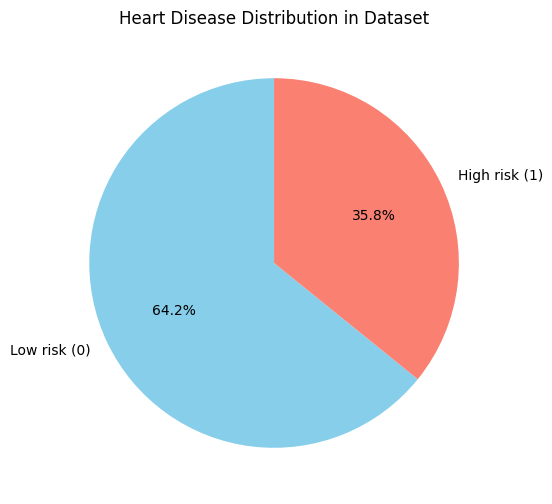

 Accuracy: 0.6417569880205363

 Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


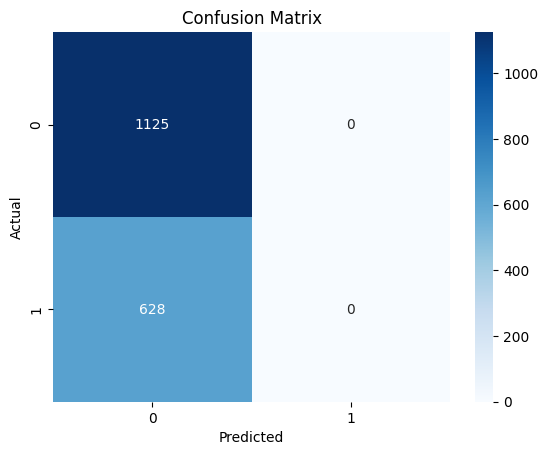

In [7]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/heart_attack_prediction_dataset.csv.zip")  # Replace with your file path

# Process 'Blood Pressure' column (split into systolic and diastolic)
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
df = df.drop('Blood Pressure', axis=1)

# 📊 Pie chart for target distribution
target_counts = df['Heart Attack Risk'].value_counts()
labels = ['Low risk (0)', 'High risk (1)']
colors = ['skyblue', 'salmon']
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Heart Disease Distribution in Dataset")
plt.show()

# Features and target
# Exclude 'Patient ID' as it's not a feature
X = df.drop(["Heart Attack Risk", "Patient ID"], axis=1)
y = df["Heart Attack Risk"]

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the full pipeline including preprocessing and the SVM model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', SVC(kernel='rbf', C=1.0, gamma='scale'))])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()